In [277]:
# Description:
#The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

In [278]:
#Hours Studied: The total number of hours spent studying by each student.
#Previous Scores: The scores obtained by students in previous tests.
#Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
#Sleep Hours: The average number of hours of sleep the student had per day.
#Sample Question Papers Practiced: The number of sample question papers the student practiced.

In [279]:
#Target Variable:

#Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer.

In [281]:
## I will develop a model designed to predict student performance and achieve the most accurate results possible.

In [280]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings("ignore")

In [160]:
performance = pd.read_csv('Student_Performance.csv')
performance

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [161]:
performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [162]:
performance.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [163]:
performance.isnull().sum()/len(performance)*100

Hours Studied                       0.0
Previous Scores                     0.0
Extracurricular Activities          0.0
Sleep Hours                         0.0
Sample Question Papers Practiced    0.0
Performance Index                   0.0
dtype: float64

<Axes: ylabel='Hours Studied'>

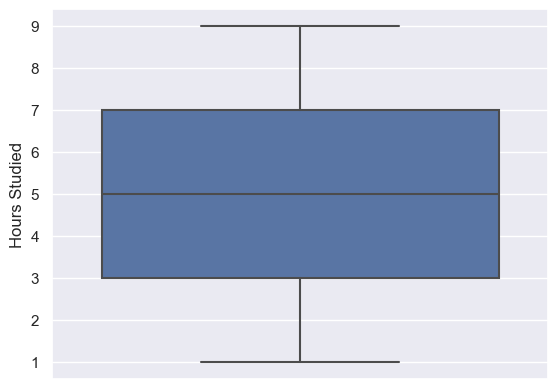

In [164]:
sns.boxplot(y=performance['Hours Studied'],data =performance)

Enter the column you want to exclude=Performance Index


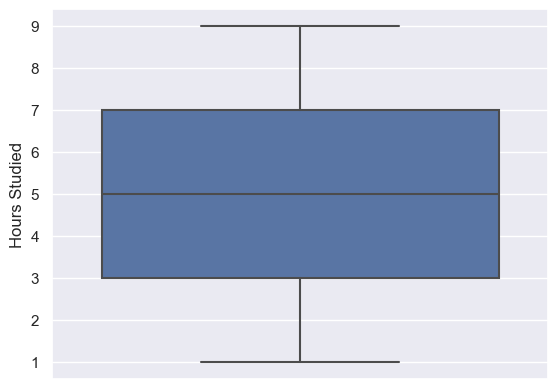

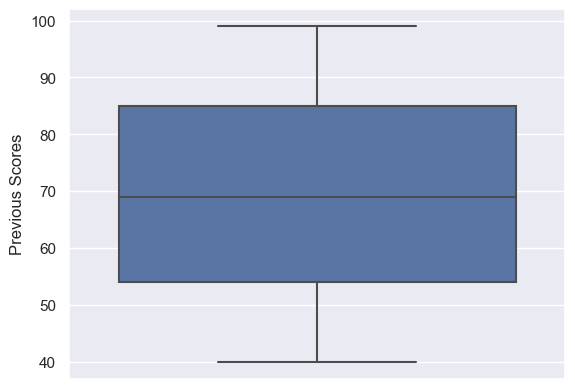

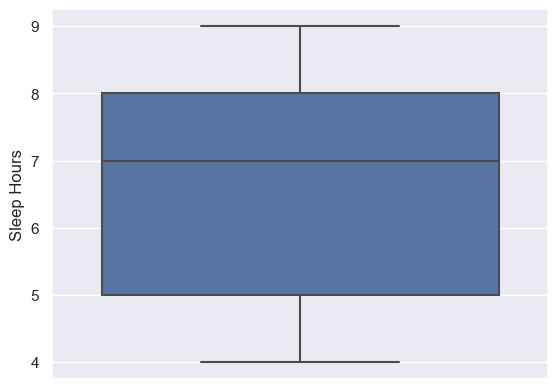

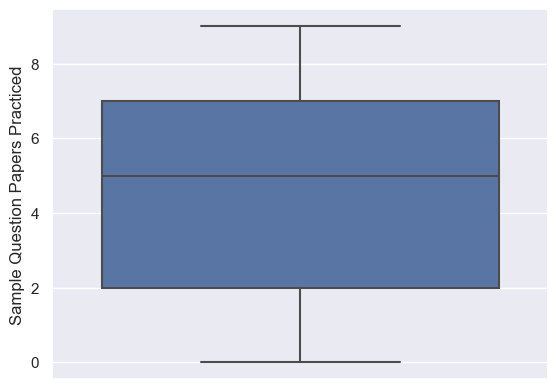

In [14]:
def Box_Plot(col,df) :
    sns.boxplot(y=performance[col],data=df)
    plt.show()
Exclude_colum = input('Enter the column you want to exclude=')
for i in list(performance.select_dtypes(exclude=['object']).columns):
    if i != Exclude_colum :
        Box_Plot(i,performance)
              
              

In [282]:
# convert catogerical data into numerical using encoder method 

In [283]:
from sklearn.preprocessing import OneHotEncoder 
enc = OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False,)
ohk = enc.fit_transform(performance[['Extracurricular Activities']])
column_names = enc.get_feature_names_out(['Extracurricular Activities'])
ohk
ohk = ohk.astype(int)

In [166]:
df = pd.DataFrame(ohk,columns=column_names)
df

,Extracurricular Activities_Yes
0,1
1,0
2,1
3,1
4,0
...,...
9995,1
9996,1
9997,1
9998,1


In [167]:
X= performance.iloc[:,: -1]

In [168]:
X = X.drop(columns=['Extracurricular Activities'])

In [169]:
X_New = pd.concat([X,df],axis =1)

In [170]:
X_New

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
0,7,99,9,1,1
1,4,82,4,2,0
2,8,51,7,2,1
3,5,52,5,2,1
4,7,75,8,5,0
...,...,...,...,...,...
9995,1,49,4,2,1
9996,7,64,8,5,1
9997,6,83,8,5,1
9998,9,97,7,0,1


In [171]:
y_target = performance.iloc[:,-1]

In [172]:
y_target

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

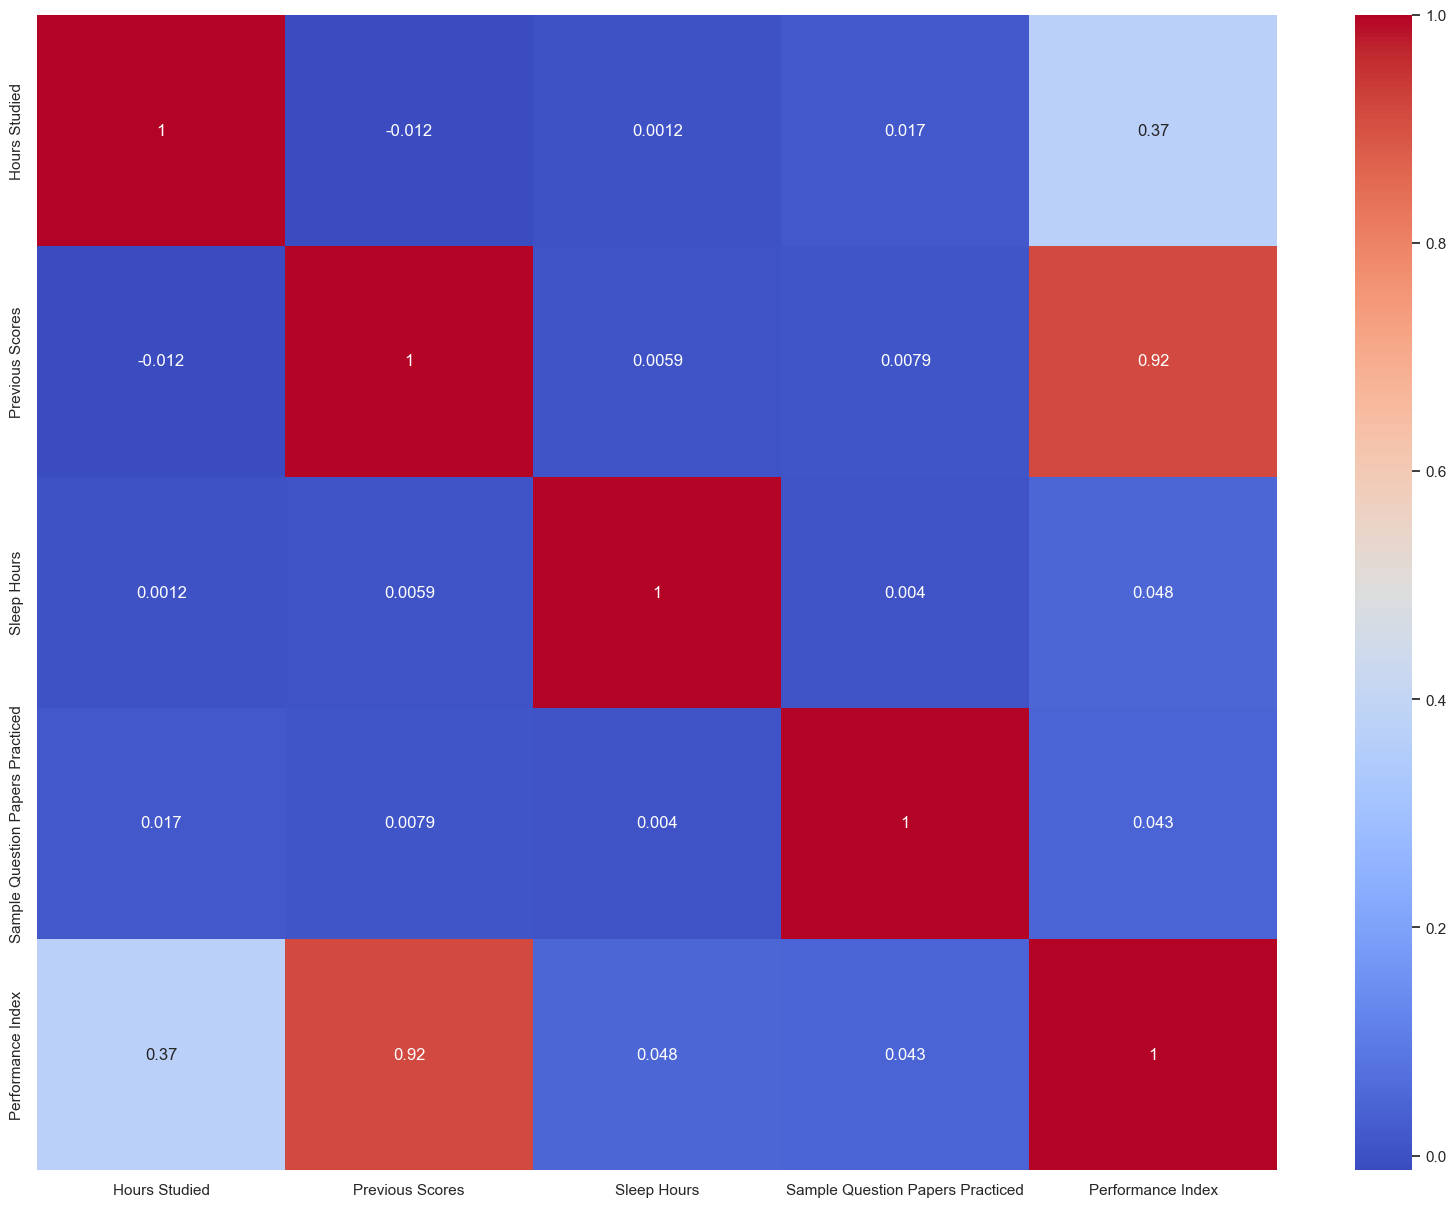

In [204]:
plt.figure(figsize=(20,15))
#corr = performance.corr()
sns.heatmap(performance.corr(), annot=True, cmap='coolwarm')
plt.show()

In [225]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tt_a = scaler.fit_transform(X_New)
kB=pd.DataFrame(tt_a,columns =X_New.columns)

In [226]:
# VIF value is more than 5 means there is a multicollinearity there in the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable = tt_a
vif = pd.DataFrame()
vif['variance_inflation_factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]

vif['Features'] = X_New.columns

In [227]:
vif

,variance_inflation_factor,Features
0,1.000478,Hours Studied
1,1.000326,Previous Scores
2,1.000600,Sleep Hours
3,1.000557,Sample Question Papers Practiced
4,1.000802,Extracurricular Activities_Yes


In [228]:
tt_a.shape

(10000, 5)

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
x_train,x_test,y_train,y_test = train_test_split(X_New,y_target,train_size=0.75,random_state =101)

In [175]:
x_train

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
4492,5,79,4,6,1
966,3,53,6,7,1
7002,2,64,6,9,1
8374,9,41,9,4,0
3075,6,75,7,0,1
...,...,...,...,...,...
599,9,53,4,2,0
5695,4,92,8,2,1
8006,9,40,9,5,1
1361,7,51,8,2,0


In [176]:
x_train.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
count,7500.000000,7500.000000,7500.000000,7500.00000,7500.000000
mean,4.978267,69.608667,6.537467,4.58800,0.489467
std,2.602927,17.372577,1.704714,2.87131,0.499922
min,1.000000,40.000000,4.000000,0.00000,0.000000
25%,3.000000,55.000000,5.000000,2.00000,0.000000
50%,5.000000,69.000000,7.000000,5.00000,0.000000
75%,7.000000,85.000000,8.000000,7.00000,1.000000
max,9.000000,99.000000,9.000000,9.00000,1.000000


In [177]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tt_x = scaler.fit_transform(x_train)
kB=pd.DataFrame(tt_x,columns =x_train.columns)

In [178]:
kB

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
0,0.008350,0.540620,-1.488599,0.491794,1.021293
1,-0.760067,-0.956092,-0.315304,0.840091,1.021293
2,-1.144275,-0.322868,-0.315304,1.536683,1.021293
3,1.545184,-1.646881,1.444640,-0.204798,-0.979151
4,0.392559,0.310357,0.271344,-1.597983,1.021293
...,...,...,...,...,...
7495,1.545184,-0.956092,-1.488599,-0.901391,-0.979151
7496,-0.375858,1.288976,0.857992,-0.901391,1.021293
7497,1.545184,-1.704447,1.444640,0.143498,1.021293
7498,0.776767,-1.071223,0.857992,-0.901391,-0.979151


In [179]:
kB.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
count,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03
mean,7.389644e-17,1.250555e-16,-1.629511e-16,-1.231607e-17,3.315866e-18
std,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00
min,-1.528484e+00,-1.704447e+00,-1.488599e+00,-1.597983e+00,-9.791506e-01
25%,-7.600667e-01,-8.409599e-01,-9.019513e-01,-9.013908e-01,-9.791506e-01
50%,8.350130e-03,-3.503840e-02,2.713441e-01,1.434981e-01,-9.791506e-01
75%,7.767670e-01,8.860148e-01,8.579918e-01,8.400907e-01,1.021293e+00
max,1.545184e+00,1.691936e+00,1.444640e+00,1.536683e+00,1.021293e+00


In [180]:
ttest_x = scaler.transform(x_test)
tTT=pd.DataFrame(ttest_x,columns = x_test.columns)

In [181]:
tTT.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Extracurricular Activities_Yes
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.022489,-0.037525,-0.016113,-0.006548,0.042676
std,0.978974,0.992941,0.979230,0.994718,1.000189
min,-1.528484,-1.704447,-1.488599,-1.597983,-0.979151
25%,-0.760067,-0.898526,-0.901951,-0.901391,-0.979151
50%,0.008350,-0.035038,0.271344,0.143498,1.021293
75%,0.776767,0.828449,0.857992,0.840091,1.021293
max,1.545184,1.691936,1.444640,1.536683,1.021293


In [182]:
# VIF value is more than 5 means there is a multicollinearity there in the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
variable =tt_x
vif = pd.DataFrame()
vif['variance_inflation_factor'] = [variance_inflation_factor(variable, i) for i in range(variable.shape[1])]

vif['Features'] = kB.columns

In [183]:
vif

,variance_inflation_factor,Features
0,1.000932,Hours Studied
1,1.000336,Previous Scores
2,1.000926,Sleep Hours
3,1.000880,Sample Question Papers Practiced
4,1.001073,Extracurricular Activities_Yes


In [258]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(tt_x, y_train)

LinearRegression()

In [259]:
print(lm.coef_)

[ 7.42681548 17.68338236  0.82609314  0.55451753  0.31747639]


In [260]:
print(lm.intercept_)

55.34733333333333


In [248]:
kB.columns

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Extracurricular Activities_Yes'],
      dtype='object')

In [264]:
y_pred = lm.predict(ttest_x)
y_pred

array([44.39794383, 96.15915413, 30.53126182, ..., 47.49757924,
       26.29437254, 48.94710951])

In [265]:
y_test.sum()/2500

54.8572

In [266]:
y_pred.sum()/2500

54.84738846867022

In [252]:
from sklearn.metrics import r2_score
print("Accuracy :", r2_score(y_test, y_pred))

Accuracy : 0.988829509896184


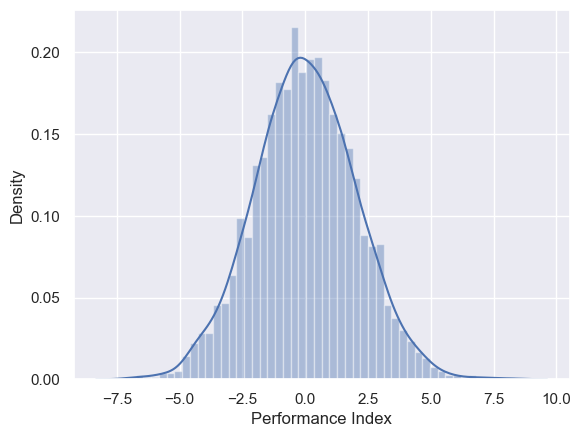

In [253]:
sns.distplot((y_test - y_pred), bins=50)
plt.show()

In [192]:
y_train_predict = lm.predict(tt_x)
y_predict_test = lm.predict(ttest_x)

In [193]:
from sklearn.metrics import r2_score
print("Accuracy of LM Data Train :", r2_score(y_train,y_train_predict))

Accuracy of LM Data Train : 0.988724258593045


In [194]:
from sklearn.metrics import r2_score
print("Accuracy of LM Data Test :", r2_score(y_test,y_predict_test))

Accuracy of LM Data Test : 0.988829509896184


In [286]:
### Approach no - 2 : OLS Method

In [86]:
from statsmodels.regression.linear_model import OLS
import statsmodels.regression.linear_model as sms

In [109]:
reg_model = sms.OLS(endog=y_train,exog=x_train).fit()

In [110]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Performance Index   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.489e+05
Date:                Fri, 23 Aug 2024   Prob (F-statistic):                        0.00
Time:                        00:53:58   Log-Likelihood:                         -23892.
No. Observations:                7500   AIC:                                  4.779e+04
Df Residuals:                    7495   BIC:                                  4.783e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Hours Studied                        2.2174      0.025     89.531      0.000       2.169       2.266
Previous Scores                      0.8151      0.003    273.390      0.000       0.809       0.821
Sleep Hours                         -1.4828      0.031    -47.240      0.000      -1.544      -1.421
Sample Question Papers Practiced    -0.2819      0.023    -12.361      0.000      -0.327      -0.237
Extracurricular Activities_Yes      -1.1491      0.133     -8.610      0.000      -1.411      -0.887
==============================================================================
Omnibus:                       44.593   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.554
Skew:                          -0.005   Prob(JB):                     1.41e-07
Kurtosis:                       2.682   Cond. No.                         143.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [289]:
# # Regularisation Method
### 1) Lasso - L1 regularization
### 2) Ridge - L2 regularization *************************** very significant

In [290]:
# Lasso method - exact zero or closure to zero (slope/coefficient)
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.3)
lasso.fit(tt_x, y_train)
print("Lasso Regularisation", lasso.coef_)

Lasso Regularisation [ 7.13500911 17.38364169  0.5245998   0.26580824  0.01831867]


In [197]:
y_Predict_Lasso = lasso.predict(ttest_x)

In [198]:
y_Predict_Lasso

array([45.32475484, 94.89016326, 31.34517375, ..., 47.11716965,
       27.27706883, 49.46712448])

In [199]:
y_train_predict_Lasso = lasso.predict(tt_x)
y_predict_test_Lasso = lasso.predict(ttest_x)

In [200]:
print("Accuracy Of y_train_predict_Lasso ",r2_score(y_train,y_train_predict_Lasso))
print("Accuracy Of y_test_predict_Lasso ",r2_score(y_test,y_predict_test_Lasso))

Accuracy Of y_train_predict_Lasso  0.9875245489891106
Accuracy Of y_test_predict_Lasso  0.9877093675395204


In [291]:
### Rigdge Method 

In [201]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.3)
ridge.fit(tt_x, y_train)
print("Ridge Model :", ridge.coef_)

Ridge Model : [ 7.42650979 17.68267122  0.82606997  0.55450041  0.31747066]


In [202]:
y_train_predict_Ridge = ridge.predict(tt_x)
y_predict_test_Ridge = ridge.predict(ttest_x)

In [203]:
print("Accuracy Of y_train_predict_Lasso ",r2_score(y_train,y_train_predict_Ridge))
print("Accuracy Of y_test_predict_Lasso ",r2_score(y_test,y_predict_test_Ridge))

Accuracy Of y_train_predict_Lasso  0.9887242569862597
Accuracy Of y_test_predict_Lasso  0.9888293946787585


In [285]:
#Using Grdient descent to find the coefficient and predicted value 

In [267]:
from sklearn.linear_model import SGDRegressor
gdmodel = SGDRegressor()
gdmodel.fit(tt_x, y_train)

SGDRegressor()

In [268]:
gdmodel.coef_

array([ 7.4155114 , 17.68355476,  0.80824602,  0.5517279 ,  0.29757975])

In [269]:
gdmodel_Predict_Y_test = gdmodel.predict(ttest_x)

In [270]:
print(gdmodel_Predict_Y_test)

[44.46734137 96.14810852 30.56793913 ... 47.49043015 26.34965327
 49.00073226]


In [271]:
# Cross Validation Score - K-Fold method

In [272]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(lm, x_train, y_train, cv=10)

In [273]:
print('training_accuracy for all 10 indivisual :', training_accuracy)
print()
print("training_accuracy with mean value :", training_accuracy.mean())
print()
print("training_accuracy max value :", training_accuracy.max())

training_accuracy for all 10 indivisual : [0.9884472  0.98911345 0.98824998 0.9880961  0.98874662 0.98788239
 0.98893982 0.98995028 0.98866554 0.98864696]

training_accuracy with mean value : 0.9886738344474916

training_accuracy max value : 0.9899502801715544


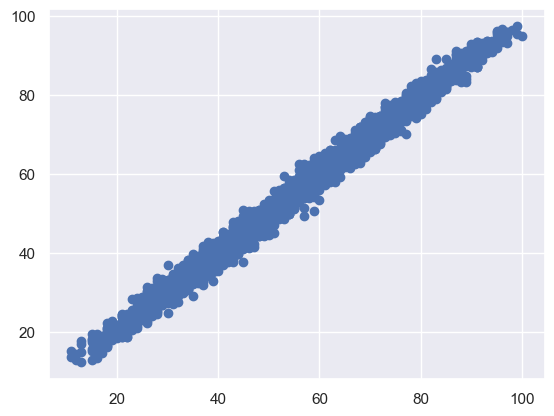

In [292]:
plt.scatter(y_test, y_pred)
plt.show()